# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Statements

In [ ]:
import requests
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Parse Visual Crossing Weather txt File

In [ ]:
weather_df = pd.read_csv('/content/drive/My Drive/Bus Watcher Spec Project/Projects/Alex Amy + Sanket Shah/Data/Weather/vc_weather_data_raw.txt')
weather_df['Date time'] = pd.to_datetime(weather_df['Date time'])

In [ ]:
weather_df

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Contributing Stations,Weather Type,Conditions
0,"New York, NY, United States",2021-07-31 23:51:00,21.2,21.2,21.2,NaN,NaN,0.0,NaN,0.0,NaN,16.0,0.0,59.10,KNYC (6.6KM),NaN,Clear
1,"New York, NY, United States",2021-08-01 00:51:00,20.7,20.7,20.7,NaN,NaN,0.0,NaN,5.4,NaN,16.0,0.0,62.97,KNYC (6.6KM),NaN,Clear
2,"New York, NY, United States",2021-08-01 01:51:00,21.2,21.2,21.2,NaN,NaN,0.0,NaN,5.4,NaN,16.0,0.0,61.06,KNYC (6.6KM),NaN,Clear
3,"New York, NY, United States",2021-08-01 02:51:00,20.7,20.7,20.7,NaN,NaN,0.0,NaN,0.0,NaN,16.0,0.0,62.97,KNYC (6.6KM),NaN,Clear
4,"New York, NY, United States",2021-08-01 03:51:00,19.4,19.4,19.4,NaN,NaN,0.0,NaN,5.4,NaN,16.0,0.0,72.82,KNYC (6.6KM),NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159951,"New York, NY, United States",2021-09-30 23:36:00,14.5,14.5,14.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,BATN6 (1.7KM),NaN,Clear
159952,"New York, NY, United States",2021-09-30 23:42:00,14.5,14.5,14.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,BATN6 (1.7KM),NaN,Clear
159953,"New York, NY, United States",2021-09-30 23:48:00,14.5,14.5,14.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,BATN6 (1.7KM),NaN,Clear
159954,"New York, NY, United States",2021-09-30 23:54:00,14.5,14.5,14.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,BATN6 (1.7KM),NaN,Clear


In [ ]:
len(set(weather_df['Contributing Stations']))

33

In [ ]:
for station in set(weather_df['Contributing Stations']):
  station_df = weather_df[weather_df['Contributing Stations'] == station]
  print(station)
  print(station_df.isna().sum() / station_df.shape[0])
  print('\n')

72505004781 (77.0KM)
Name                     0.000000
Date time                0.000000
Maximum Temperature      0.000000
Minimum Temperature      0.000000
Temperature              0.000000
Wind Chill               1.000000
Heat Index               0.891468
Precipitation            0.000000
Snow Depth               1.000000
Wind Speed               0.000000
Wind Gust                0.978840
Visibility               0.000000
Cloud Cover              0.000000
Relative Humidity        0.000000
Contributing Stations    0.000000
Weather Type             0.905802
Conditions               0.000000
dtype: float64


KCDW (30.0KM)
Name                     0.000000
Date time                0.000000
Maximum Temperature      0.000000
Minimum Temperature      0.000000
Temperature              0.000000
Wind Chill               1.000000
Heat Index               0.829335
Precipitation            0.000000
Snow Depth               1.000000
Wind Speed               0.005242
Wind Gust                0.968

# Clean Weatherstation DataFrame (JFK)

In [ ]:
weather_data_jfk = weather_df[weather_df['Contributing Stations'] == 'KJFK (21.0KM)']
weather_data_jfk.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Contributing Stations,Weather Type,Conditions
39159,"New York, NY, United States",2021-07-31 23:30:00,21.0,21.0,21.0,NaN,NaN,0.0,NaN,14.8,NaN,16.0,0.0,73.11,KJFK (21.0KM),NaN,Clear
39160,"New York, NY, United States",2021-07-31 23:35:00,20.0,20.0,20.0,NaN,NaN,0.0,NaN,14.8,NaN,16.0,0.0,77.76,KJFK (21.0KM),NaN,Clear
39161,"New York, NY, United States",2021-07-31 23:40:00,20.0,20.0,20.0,NaN,NaN,0.0,NaN,14.8,NaN,16.0,0.0,77.76,KJFK (21.0KM),NaN,Clear
39162,"New York, NY, United States",2021-07-31 23:45:00,21.0,21.0,21.0,NaN,NaN,0.0,NaN,14.8,NaN,16.0,NaN,73.11,KJFK (21.0KM),NaN,Clear
39163,"New York, NY, United States",2021-07-31 23:50:00,20.0,20.0,20.0,NaN,NaN,0.0,NaN,11.2,NaN,16.0,NaN,77.76,KJFK (21.0KM),NaN,Clear


In [ ]:
weather_data_jfk = weather_data_jfk.drop(columns=['Name', 'Maximum Temperature', 'Minimum Temperature', 'Wind Chill', 'Heat Index', 'Snow Depth', 'Contributing Stations', 'Weather Type'])

In [ ]:
weather_data_jfk.isna().sum() / weather_data_jfk.shape[0]

Date time            0.000000
Temperature          0.000000
Precipitation        0.000000
Wind Speed           0.001357
Wind Gust            0.965978
Visibility           0.000000
Cloud Cover          0.034603
Relative Humidity    0.000000
Conditions           0.000000
dtype: float64

In [ ]:
weather_data_jfk[weather_data_jfk['Wind Speed'].isna() == True]

,Date time,Temperature,Precipitation,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
39707,2021-08-02 17:50:00,27.0,0.0,NaN,NaN,16.0,50.0,39.32,Partially cloudy
40602,2021-08-05 14:45:00,26.0,0.0,NaN,NaN,16.0,50.0,61.38,Partially cloudy
44344,2021-09-13 18:45:00,27.0,0.0,NaN,NaN,16.0,88.0,61.60,Overcast
45846,2021-09-18 14:50:00,29.0,0.0,NaN,NaN,16.0,50.0,51.49,Partially cloudy
45879,2021-09-18 17:20:00,29.0,0.0,NaN,NaN,16.0,25.0,54.82,Clear
46158,2021-09-19 14:50:00,26.0,0.0,NaN,NaN,16.0,25.0,36.53,Clear
46159,2021-09-19 14:51:00,25.0,0.0,NaN,NaN,16.0,25.0,38.76,Clear
46167,2021-09-19 15:30:00,26.0,0.0,NaN,NaN,16.0,0.0,36.53,Clear
46183,2021-09-19 16:45:00,26.0,0.0,NaN,NaN,16.0,25.0,39.04,Clear
46413,2021-09-20 10:30:00,23.0,0.0,NaN,NaN,16.0,88.0,64.71,Overcast


In [ ]:
weather_data_jfk[weather_data_jfk['Wind Speed'].isna() == True].shape[0]

14

In [ ]:
weather_data_jfk[weather_data_jfk['Wind Gust'].isna() == True]

,Date time,Temperature,Precipitation,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
39159,2021-07-31 23:30:00,21.0,0.0,14.8,NaN,16.0,0.0,73.11,Clear
39160,2021-07-31 23:35:00,20.0,0.0,14.8,NaN,16.0,0.0,77.76,Clear
39161,2021-07-31 23:40:00,20.0,0.0,14.8,NaN,16.0,0.0,77.76,Clear
39162,2021-07-31 23:45:00,21.0,0.0,14.8,NaN,16.0,NaN,73.11,Clear
39163,2021-07-31 23:50:00,20.0,0.0,11.2,NaN,16.0,NaN,77.76,Clear
...,...,...,...,...,...,...,...,...,...
49471,2021-09-30 23:45:00,14.0,0.0,11.2,NaN,16.0,0.0,67.14,Clear
49472,2021-09-30 23:50:00,13.0,0.0,11.2,NaN,16.0,25.0,71.65,Clear
49473,2021-09-30 23:51:00,13.4,0.0,11.2,NaN,16.0,25.0,69.33,Clear
49474,2021-09-30 23:55:00,13.0,0.0,13.0,NaN,16.0,0.0,71.65,Clear


In [ ]:
weather_data_jfk[weather_data_jfk['Cloud Cover'].isna() == True]

,Date time,Temperature,Precipitation,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
39162,2021-07-31 23:45:00,21.0,0.0,14.8,NaN,16.0,NaN,73.11,Clear
39163,2021-07-31 23:50:00,20.0,0.0,11.2,NaN,16.0,NaN,77.76,Clear
39176,2021-08-01 00:50:00,19.0,0.0,11.2,NaN,16.0,NaN,82.75,Clear
39189,2021-08-01 01:50:00,19.0,0.0,11.2,NaN,16.0,NaN,82.75,Clear
39202,2021-08-01 02:50:00,19.0,0.0,11.2,NaN,16.0,NaN,82.75,Clear
...,...,...,...,...,...,...,...,...,...
48769,2021-09-28 01:50:00,19.0,0.0,20.5,NaN,16.0,NaN,72.75,Clear
48782,2021-09-28 02:50:00,19.0,0.0,18.4,NaN,16.0,NaN,77.61,Clear
48795,2021-09-28 03:50:00,19.0,0.0,22.3,NaN,16.0,NaN,77.61,Clear
48808,2021-09-28 04:50:00,19.0,0.0,16.6,NaN,16.0,NaN,77.61,Clear


In [ ]:
weather_data_jfk['Wind Speed'].fillna(0.0, inplace=True)
weather_data_jfk['Wind Gust'].fillna(0.0, inplace=True)
weather_data_jfk['Cloud Cover'].fillna(0.0, inplace=True)

In [ ]:
weather_data_jfk.shape

(10317, 9)

In [ ]:
5 * 12 * 24 * 60

86400

In [ ]:
times = list(weather_data_jfk['Date time'])
diffs = []
for i, next_time in enumerate(times[1:]):
  prior_time = times[i]
  diff = next_time - prior_time
  diff = diff.total_seconds() / 60
  if diff > 5:
    print(prior_time, next_time, diff)
  diffs.append(diff)

2021-08-02 14:20:00 2021-08-02 14:30:00 10.0
2021-08-02 15:00:00 2021-08-02 15:10:00 10.0
2021-08-02 15:15:00 2021-08-02 15:25:00 10.0
2021-08-02 16:55:00 2021-08-02 17:05:00 10.0
2021-08-02 17:55:00 2021-08-02 18:05:00 10.0
2021-08-02 19:55:00 2021-08-02 20:05:00 10.0
2021-08-07 22:00:00 2021-08-07 22:10:00 10.0
2021-08-07 23:45:00 2021-08-07 23:51:00 6.0
2021-08-08 00:55:00 2021-08-08 01:05:00 10.0
2021-08-08 02:55:00 2021-08-08 03:05:00 10.0
2021-08-08 19:55:00 2021-08-08 20:51:00 56.0
2021-08-08 20:51:00 2021-08-08 21:51:00 60.0
2021-08-08 21:51:00 2021-08-08 22:51:00 60.0
2021-08-08 22:51:00 2021-08-08 23:41:00 50.0
2021-08-08 23:41:00 2021-08-08 23:51:00 10.0
2021-08-08 23:51:00 2021-08-09 00:51:00 60.0
2021-08-09 00:51:00 2021-08-09 01:51:00 60.0
2021-08-09 01:51:00 2021-08-09 02:51:00 60.0
2021-08-09 02:51:00 2021-08-09 03:51:00 60.0
2021-08-09 03:51:00 2021-08-09 04:51:00 60.0
2021-08-09 04:51:00 2021-08-09 05:51:00 60.0
2021-08-09 05:51:00 2021-08-09 06:14:00 23.0
2021-08-09 

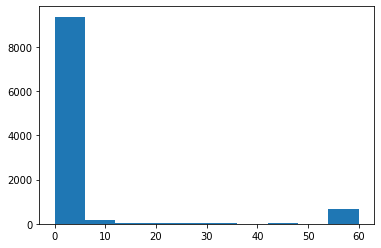

In [ ]:
plt.hist(diffs)
plt.show()

In [ ]:
weather_data_jfk.to_csv('/content/drive/My Drive/Bus Watcher Spec Project/Projects/Alex Amy + Sanket Shah/Data/Weather/vc_weather_data_JFK.csv', index=False)